<a href="https://colab.research.google.com/github/swethanjali24/random_forest_assignment/blob/main/HeartStroke_Prediction_randomForest_classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [3]:
# Read the data
df=pd.read_csv('/content/drive/MyDrive/assignments-BE/RandomForest/healthcare-dataset-stroke-data.csv.xls')

In [4]:

print(df.head())
df['stroke'].value_counts()# highly imbalanced data
df.isnull().sum()
df['bmi']=df['bmi'].fillna(df['bmi'].mean())
df.duplicated().sum()# no duplicates



      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


np.int64(0)

In [5]:
df['stroke'].value_counts()

,count
stroke,
0,4861
1,249


In [6]:
#Column id can be removed as there will no importance of this column and any difference
df=df.drop('id',axis=1)


In [7]:
# converting categorical to numerical columns
df=pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
print(df.head())

    age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  67.0             0              1             228.69  36.600000       1   
1  61.0             0              0             202.21  28.893237       1   
2  80.0             0              1             105.92  32.500000       1   
3  49.0             0              0             171.23  34.400000       1   
4  79.0             1              0             174.12  24.000000       1   

   gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0          False         True         False            False  ...   
1           True        False         False            False  ...   
2          False         True         False            False  ...   
3           True        False         False            False  ...   
4           True        False         False            False  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               Tru

<Axes: >

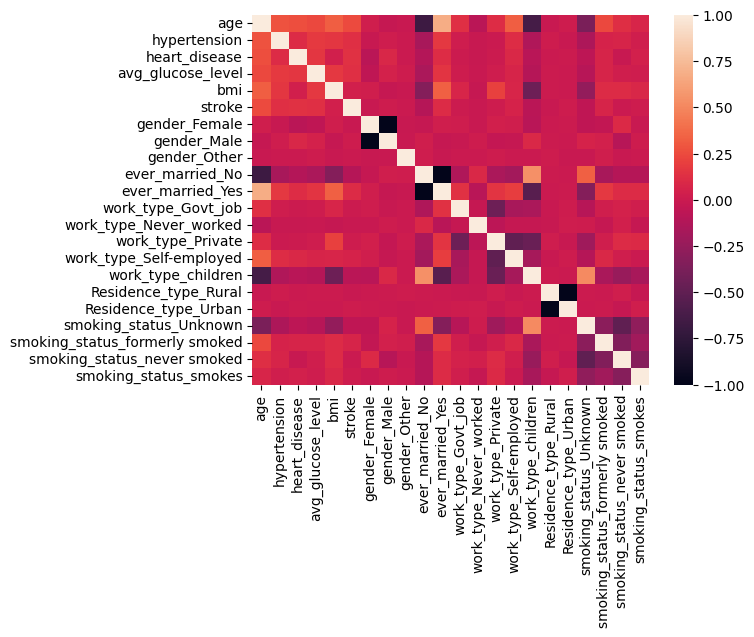

In [8]:
sns.heatmap(df.corr())

In [9]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
print(df.head())

        age  hypertension  heart_disease  avg_glucose_level       bmi  stroke  \
0  0.816895           0.0            1.0           0.801265  0.301260     1.0   
1  0.743652           0.0            0.0           0.679023  0.212981     1.0   
2  0.975586           0.0            1.0           0.234512  0.254296     1.0   
3  0.597168           0.0            0.0           0.536008  0.276060     1.0   
4  0.963379           1.0            0.0           0.549349  0.156930     1.0   

   gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0            0.0          1.0           0.0              0.0  ...   
1            1.0          0.0           0.0              0.0  ...   
2            0.0          1.0           0.0              0.0  ...   
3            1.0          0.0           0.0              0.0  ...   
4            1.0          0.0           0.0              0.0  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                     0.0

In [10]:
# train test split
x=df.drop('stroke',axis=1)
y=df['stroke']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
# model intialization
model=RandomForestClassifier(class_weight='balanced')
model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [12]:
# Predict
y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)

In [13]:
print(np.unique(y_pred))


[0.]


In [14]:
# evaluation
print('Training accuracy score:',accuracy_score(y_train,y_pred_train))
print('Training precsion score:',precision_score(y_train,y_pred_train))
print('Training recall score:',recall_score(y_train,y_pred_train))
print('Training f1 score:',f1_score(y_train,y_pred_train))

print('\nTesting accuracy score:',accuracy_score(y_test,y_pred))
print('Testing precsion score:',precision_score(y_test,y_pred))
print('Testing recall score:',recall_score(y_test,y_pred))
print('Testing f1 score:',f1_score(y_test,y_pred))

Training accuracy score: 1.0
Training precsion score: 1.0
Training recall score: 1.0
Training f1 score: 1.0

Testing accuracy score: 0.9393346379647749
Testing precsion score: 0.0
Testing recall score: 0.0
Testing f1 score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
'''
As the model is clearly neglecting the class 1,because the dataset
is highly imbalanced, we use SMOTE to balance the dataset(which over samples the minority class)
'''

In [15]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [16]:
model.fit(x_train_smote,y_train_smote)


RandomForestClassifier(class_weight='balanced')

In [17]:
y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train_smote)

In [19]:
print('Training accuracy score:',accuracy_score(y_train_smote,y_pred_train))
print('Training precsion score:',precision_score(y_train_smote,y_pred_train))
print('Training recall score:',recall_score(y_train_smote,y_pred_train))
print('Training f1 score:',f1_score(y_train_smote,y_pred_train))

print('\nTesting accuracy score:',accuracy_score(y_test,y_pred))
print('Testing precsion score:',precision_score(y_test,y_pred))
print('Testing recall score:',recall_score(y_test,y_pred))
print('Testing f1 score:',f1_score(y_test,y_pred))

Training accuracy score: 1.0
Training precsion score: 1.0
Training recall score: 1.0
Training f1 score: 1.0

Testing accuracy score: 0.9060665362035225
Testing precsion score: 0.18518518518518517
Testing recall score: 0.16129032258064516
Testing f1 score: 0.1724137931034483


In [ ]:
# Now we are getting output but model is highly overfitting

In [28]:
# using gridsearchcv
from sklearn.model_selection import GridSearchCV
params={
    'criterion':['gini','entropy'],
    'max_depth':[1,2,5,10],
    'min_samples_split':[2,3,6,7,10],
    'min_samples_leaf':[1,4,5,10]

}


In [29]:
grid_search=GridSearchCV(estimator=model,param_grid=params,cv=5,verbose=1)
grid_search.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10],
                         'min_samples_leaf': [1, 4, 5, 10],
                         'min_samples_split': [2, 3, 6, 7, 10]},
             verbose=1)

In [30]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [31]:
model=RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,min_samples_split=3,n_estimators=100)
model.fit(x_train_smote,y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=3)

In [32]:
y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train_smote)

In [33]:
print('Training accuracy score:',accuracy_score(y_train_smote,y_pred_train))
print('Training precsion score:',precision_score(y_train_smote,y_pred_train))
print('Training recall score:',recall_score(y_train_smote,y_pred_train))
print('Training f1 score:',f1_score(y_train_smote,y_pred_train))

print('\nTesting accuracy score:',accuracy_score(y_test,y_pred))
print('Testing precsion score:',precision_score(y_test,y_pred))
print('Testing recall score:',recall_score(y_test,y_pred))
print('Testing f1 score:',f1_score(y_test,y_pred))

Training accuracy score: 0.9248910535760062
Training precsion score: 0.8958681633627896
Training recall score: 0.9615483209433479
Training f1 score: 0.9275469831849654

Testing accuracy score: 0.8307240704500979
Testing precsion score: 0.1509433962264151
Testing recall score: 0.3870967741935484
Testing f1 score: 0.2171945701357466


In [ ]:
# Recall improved after using gridsearch CV, but still overfitted model